In [1]:
import pandas as pd
studentScore = pd.read_csv('student_scores.csv')

In [3]:
studentScore.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


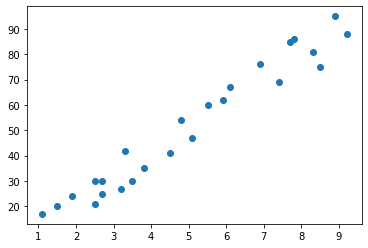

In [4]:
import matplotlib.pyplot as plt
Hours = studentScore['Hours']
Scores = studentScore['Scores']
plt.scatter(Hours,Scores)

In [10]:
studentScore.isna().sum()
studentScore.duplicated().sum()

Hours     0
Scores    0
dtype: int64

0

In [16]:
import sklearn.preprocessing as ps
import numpy as np
Encoder = ps.StandardScaler()
x = Encoder.fit_transform(np.c_[Hours])
y = Encoder.fit_transform(np.c_[Scores])

In [31]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
mean_squared_error(pred_y,test_y)

LinearRegression()

0.03678398715850661

In [47]:
petrol = pd.read_csv('petrol_consumption.csv')
petrol.isna().sum()
petrol.duplicated().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

0

In [48]:
petrol.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [71]:
from sklearn.compose import make_column_transformer
x = petrol.iloc[:,0:4]
y = petrol.iloc[:,4]
x.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [78]:
standardScaler = ps.StandardScaler()
transformer = make_column_transformer((standardScaler,['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']))
processed_x = transformer.fit_transform(x)
processed_y = standardScaler.fit_transform(np.c_[y])

In [83]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(processed_x, processed_y)


In [84]:
model = LinearRegression()
model.fit(train_x1,train_y1)
pred_y1 = model.predict(test_x1)
mean_squared_error(pred_y1,test_y1)

LinearRegression()

0.4080999315290061